In [1]:
%cd ~/REVIVAL2
%load_ext autoreload
%autoreload 2
# %load_ext blackcellmagic

/disk2/fli/REVIVAL2


In [2]:
import sys
import os
import numpy
import openmm
print(f"Python: {sys.version}")
print(f"NumPy: {numpy.__version__}")
print(f"OpenMM: {openmm.version.version}")
print(f"Environment: {os.environ}")

Python: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:11) 
[GCC 9.4.0]
NumPy: 2.0.2
OpenMM: 7.7.0.dev-130124a
Environment: environ({'USER': 'fli', 'SSH_CLIENT': '131.215.249.59 49529 22', 'XDG_SESSION_TYPE': 'tty', 'SHLVL': '2', 'MOTD_SHOWN': 'pam', 'HOME': '/disk2/fli', 'OLDPWD': '/disk2/fli/.vscode-server', 'SSL_CERT_FILE': '/usr/lib/ssl/certs/ca-certificates.crt', 'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1002/bus', 'LOGNAME': 'fli', '_': '/disk2/fli/miniconda3/envs/vina/bin/python', 'XDG_SESSION_CLASS': 'user', 'XDG_SESSION_ID': '11349', 'VSCODE_CLI_REQUIRE_TOKEN': 'bba36035-143a-4a7f-bb2b-7cd617aa4f8f', 'PATH': '/disk2/fli/miniconda3/envs/vina/bin:/disk2/fli/.vscode-server/cli/servers/Stable-91fbdddc47bc9c09064bf7acf133d22631cbf083/server/bin/remote-cli:/disk2/fli/.local/bin:/disk2/fli/openmpi/bin:/disk2/fli/orca_6_0_1:/disk2/fli/miniconda3/envs/vina/bin:/disk2/fli/miniconda3/condabin:/disk2/fli/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/

In [7]:
from REVIVAL.global_param import LIB_INFO_DICT

In [181]:
from REVIVAL.zs.vina import dock

dock(
    input_struct_path="/disk2/fli/REVIVAL2/zs/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V/I165A:I183A:Y301V_0.cif",
    dock_opt="substrate",
    score_only = True,
    regen=True,
    rerun=True
)

Converting CIF to PDB: /disk2/fli/REVIVAL2/zs/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V/I165A:I183A:Y301V_0.cif -> /disk2/fli/REVIVAL2/zs/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V/I165A:I183A:Y301V_0.pdb
Detected residues to replace: set()


1 molecule converted


Formatting ligand 4bromo
Checking for ions...
Processing ligand 4bromo from zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/I165A:I183A:Y301V_0.pdb
insdie extract_substruct
/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_temp.pdb
Substrate atoms: [(<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C1>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C2>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C3>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C4>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C5>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C6>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom N1>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode= >, <Atom C7>), (<Model id=0>, <Chain id=B>, <Residue LIG het=  resseq=1 icode

ValueError: Expecting a numeric array for transformation

In [82]:
from REVIVAL.zs.vina import protonate_smiles

In [83]:
from rdkit import Chem

In [171]:
# from rdkit import Chem
# from rdkit.Chem import AllChem
# import numpy as np

# def align_and_fix_molecule(smiles: str, original_pdb: str, generated_pdb: str, output_pdb: str):
#     """
#     Align and fix a molecule based on SMILES and PDB structures.

#     Args:
#         smiles (str): SMILES string of the molecule.
#         original_pdb (str): Path to the original PDB file.
#         generated_pdb (str): Path to the generated PDB file with hydrogens.
#         output_pdb (str): Path to save the aligned and fixed PDB file.
#     """
#     # Step 1: Load the original PDB molecule
#     mol_original = Chem.MolFromPDBFile(original_pdb, removeHs=False)
#     if not mol_original:
#         raise ValueError("Could not parse the original PDB file.")

#     # Step 2: Load the generated PDB molecule with hydrogens
#     mol_generated = Chem.MolFromPDBFile(generated_pdb, removeHs=False)
#     if not mol_generated:
#         raise ValueError("Could not parse the generated PDB file.")

#     # Step 3: Create a molecule from SMILES with correct connectivity and bond orders
#     mol_smiles = Chem.MolFromSmiles(smiles)
#     if not mol_smiles:
#         raise ValueError("Invalid SMILES string.")
#     mol_smiles_with_h = Chem.AddHs(mol_smiles)

#     # Assign bond orders from SMILES to the generated molecule
#     mol_updated = AllChem.AssignBondOrdersFromTemplate(mol_smiles_with_h, mol_generated)

#     # Step 4: Align the conformers
#     conf_original = mol_original.GetConformer()
#     conf_generated = mol_updated.GetConformer()

#     # Collect heavy atom indices
#     heavy_atom_indices = [
#         i for i, atom in enumerate(mol_updated.GetAtoms()) if atom.GetSymbol() != "H"
#     ]

#     # Perform alignment based on heavy atoms
#     AllChem.AlignMol(mol_updated, mol_original, prbCid=0, refCid=0, atomMap=[(i, i) for i in heavy_atom_indices])

#     # Step 5: Transfer hydrogens from generated PDB
#     for atom_idx, atom in enumerate(mol_generated.GetAtoms()):
#         if atom.GetSymbol() == "H":
#             pos_gen = mol_generated.GetConformer().GetAtomPosition(atom_idx)
#             conf_generated.SetAtomPosition(atom_idx, pos_gen)

#     # Step 6: Save the aligned and updated molecule to PDB
#     with open(output_pdb, "w") as f:
#         f.write(Chem.MolToPDBBlock(mol_updated))

#     print(f"Aligned and fixed molecule saved to {output_pdb}")

# from rdkit import Chem
# from rdkit.Chem import AllChem
# import numpy as np


# def align_and_fix_molecule(smiles: str, original_pdb: str, generated_pdb: str, output_pdb: str):
#     """
#     Align and fix a molecule based on SMILES and PDB structures.

#     Args:
#         smiles (str): SMILES string of the molecule.
#         original_pdb (str): Path to the original PDB file.
#         generated_pdb (str): Path to the generated PDB file with hydrogens.
#         output_pdb (str): Path to save the aligned and fixed PDB file.
#     """
#     # Step 1: Load the original PDB molecule
#     mol_original = Chem.MolFromPDBFile(original_pdb, removeHs=False)
#     if not mol_original:
#         raise ValueError("Could not parse the original PDB file.")

#     # Step 2: Load the generated PDB molecule
#     mol_generated = Chem.MolFromPDBFile(generated_pdb, removeHs=False)
#     if not mol_generated:
#         raise ValueError("Could not parse the generated PDB file.")

#     # Step 3: Create a molecule from SMILES with hydrogens
#     mol_smiles = Chem.MolFromSmiles(smiles)
#     if not mol_smiles:
#         raise ValueError("Invalid SMILES string.")
#     mol_smiles_with_h = Chem.AddHs(mol_smiles)

#     # Assign bond orders from the SMILES to the generated PDB
#     mol_updated = AllChem.AssignBondOrdersFromTemplate(mol_smiles_with_h, mol_generated)

#     # Step 4: Align heavy atoms of `mol_updated` to `mol_original`
#     original_atoms = [
#         (atom.GetSymbol(), i, mol_original.GetConformer().GetAtomPosition(i))
#         for i, atom in enumerate(mol_original.GetAtoms()) if atom.GetSymbol() != "H"
#     ]
#     updated_atoms = [
#         (atom.GetSymbol(), i, mol_updated.GetConformer().GetAtomPosition(i))
#         for i, atom in enumerate(mol_updated.GetAtoms()) if atom.GetSymbol() != "H"
#     ]

#     # Match heavy atoms by element type
#     atom_map = []
#     for (symbol_orig, index_orig, _), (symbol_upd, index_upd, _) in zip(original_atoms, updated_atoms):
#         if symbol_orig == symbol_upd:
#             atom_map.append((index_upd, index_orig))

#     # Align based on heavy atom positions
#     AllChem.AlignMol(mol_updated, mol_original, atomMap=atom_map)

#     # Step 5: Update hydrogen positions from `generated_pdb`
#     for atom in mol_generated.GetAtoms():
#         if atom.GetSymbol() == "H":
#             idx = atom.GetIdx()
#             position = mol_generated.GetConformer().GetAtomPosition(idx)
#             mol_updated.GetConformer().SetAtomPosition(idx, position)

#     # Step 6: Save the aligned and fixed molecule to the output PDB
#     with open(output_pdb, "w") as f:
#         f.write(Chem.MolToPDBBlock(mol_updated))

#     print(f"Aligned and fixed molecule saved to {output_pdb}")
# from rdkit import Chem
# from rdkit.Chem import AllChem, rdMolAlign
# import numpy as np

# def align_and_fix_molecule(smiles: str, original_pdb: str, generated_pdb: str, output_pdb: str):
#     """
#     Align and fix a molecule based on SMILES and PDB structures.

#     Args:
#         smiles (str): SMILES string of the molecule.
#         original_pdb (str): Path to the original PDB file.
#         generated_pdb (str): Path to the generated PDB file with hydrogens.
#         output_pdb (str): Path to save the aligned and fixed PDB file.
#     """
#     # Step 1: Load the original PDB molecule
#     mol_original = Chem.MolFromPDBFile(original_pdb, removeHs=False)
#     if not mol_original:
#         raise ValueError("Could not parse the original PDB file.")

#     # Step 2: Load the generated PDB molecule with hydrogens
#     mol_generated = Chem.MolFromPDBFile(generated_pdb, removeHs=False)
#     if not mol_generated:
#         raise ValueError("Could not parse the generated PDB file.")

#     # Step 3: Create a molecule from SMILES with correct connectivity and bond orders
#     mol_smiles = Chem.MolFromSmiles(smiles)
#     if not mol_smiles:
#         raise ValueError("Invalid SMILES string.")

#     mol_with_h = Chem.AddHs(mol_smiles)

#     # Handle explicit protonation for atoms like O or P
#     for atom in mol_with_h.GetAtoms():
#         if atom.GetSymbol() in ["O"] and atom.GetFormalCharge() == -1:
#             atom.SetFormalCharge(0)
#             atom.SetNumExplicitHs(atom.GetNumExplicitHs() + 1)

#     AllChem.EmbedMolecule(mol_with_h, useRandomCoords=False)
#     AllChem.UFFOptimizeMolecule(mol_with_h)

#     # Step 4: Map atoms between SMILES molecule and original PDB
#     match = mol_original.GetSubstructMatch(mol_with_h)
#     if not match:
#         raise RuntimeError("No sub-structure match found between the probe and query molecules.")

#     # Step 5: Align the molecules using the matched atom indices
#     rmsd = rdMolAlign.AlignMol(mol_with_h, mol_original, atomMap=list(enumerate(match)))
#     print(f"RMSD of alignment: {rmsd}")

#     # Step 6: Save the aligned molecule as a PDB file
#     with open(output_pdb, "w") as f:
#         f.write(Chem.MolToPDBBlock(mol_with_h))

#     print(f"Aligned and fixed molecule saved to {output_pdb}")


def align_and_fix_molecule(smiles: str, original_pdb: str, generated_pdb: str, output_pdb: str):
    """
    Align and fix a molecule based on SMILES and PDB structures.

    Args:
        smiles (str): SMILES string of the molecule.
        original_pdb (str): Path to the original PDB file.
        generated_pdb (str): Path to the generated PDB file with hydrogens.
        output_pdb (str): Path to save the aligned and fixed PDB file.
    """
    # Step 1: Load the original PDB molecule
    mol_original = Chem.MolFromPDBFile(original_pdb, removeHs=False)
    if not mol_original:
        raise ValueError("Could not parse the original PDB file.")
    conf_original = mol_original.GetConformer()

    # Step 2: Load the generated PDB molecule with hydrogens
    mol_generated = Chem.MolFromPDBFile(generated_pdb, removeHs=False)
    if not mol_generated:
        raise ValueError("Could not parse the generated PDB file.")
    conf_generated = mol_generated.GetConformer()

    # Step 3: Create a molecule from SMILES with correct connectivity and bond orders
    mol_smiles = Chem.MolFromSmiles(smiles)
    if not mol_smiles:
        raise ValueError("Invalid SMILES string.")

    mol_with_h = Chem.AddHs(mol_smiles)

    # Handle explicit protonation for atoms like O or P
    for atom in mol_with_h.GetAtoms():
        if atom.GetSymbol() in ["O"] and atom.GetFormalCharge() == -1:
            atom.SetFormalCharge(0)
            atom.SetNumExplicitHs(atom.GetNumExplicitHs() + 1)

    AllChem.EmbedMolecule(mol_with_h, useRandomCoords=False)
    AllChem.UFFOptimizeMolecule(mol_with_h)
    conf_smiles = mol_with_h.GetConformer()

    # Step 4: Align the heavy atoms of the generated molecule to the original PDB
    original_atoms = [
        (atom.GetSymbol(), i, conf_original.GetAtomPosition(i))
        for i, atom in enumerate(mol_original.GetAtoms()) if atom.GetSymbol() != "H"
    ]
    smiles_atoms = [
        (atom.GetSymbol(), i, conf_smiles.GetAtomPosition(i))
        for i, atom in enumerate(mol_with_h.GetAtoms()) if atom.GetSymbol() != "H"
    ]
    print(original_atoms)
    print(smiles_atoms)

    # Match atoms based on element type
    matched_coords_original = []
    matched_coords_smiles = []
    for (symbol_orig, index_orig, coord_orig), (symbol_smiles, index_smiles, coord_smiles) in zip(original_atoms, smiles_atoms):
        if symbol_orig == symbol_smiles:
            matched_coords_original.append(coord_orig)
            matched_coords_smiles.append(coord_smiles)

    if not matched_coords_original or not matched_coords_smiles:
        raise ValueError("Failed to find matching heavy atoms for alignment.")

    # Step 5: Compute alignment transformation (RMSD alignment)
    matched_coords_original = np.array(matched_coords_original)
    matched_coords_smiles = np.array(matched_coords_smiles)

    centroid_original = np.mean(matched_coords_original, axis=0)
    centroid_smiles = np.mean(matched_coords_smiles, axis=0)

    centered_original = matched_coords_original - centroid_original
    centered_smiles = matched_coords_smiles - centroid_smiles

    H = np.dot(centered_smiles.T, centered_original)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(U, Vt)

    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = np.dot(U, Vt)

    # Step 6: Apply transformation to all atoms in the SMILES molecule
    coords_smiles = np.array([conf_smiles.GetAtomPosition(i) for i in range(mol_with_h.GetNumAtoms())])
    transformed_coords = np.dot(coords_smiles - centroid_smiles, R) + centroid_original

    # Update coordinates in the SMILES molecule
    for i, coord in enumerate(transformed_coords):
        conf_smiles.SetAtomPosition(i, coord)

    # Step 7: Save the transformed molecule as a PDB file
    with open(output_pdb, "w") as f:
        f.write(Chem.MolToPDBBlock(mol_with_h))

    print(f"Aligned and fixed molecule saved to {output_pdb}")


In [132]:
from REVIVAL.zs.vina import protonate_smiles, protonate_oxygen

In [151]:
mol = Chem.MolFromSmiles("C1=CC2=C(C=CN2)C(=C1)Br")
protonated_smiles = protonate_oxygen(protonate_smiles(smiles=Chem.MolToSmiles(mol, isomericSmiles=True), pH=7.4))

In [172]:
align_and_fix_molecule(
    smiles=protonated_smiles,
    original_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb",
    generated_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prealigned.pdb",
    output_pdb="/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_aligned.pdb")

RuntimeError: No sub-structure match found between the probe and query molecules.

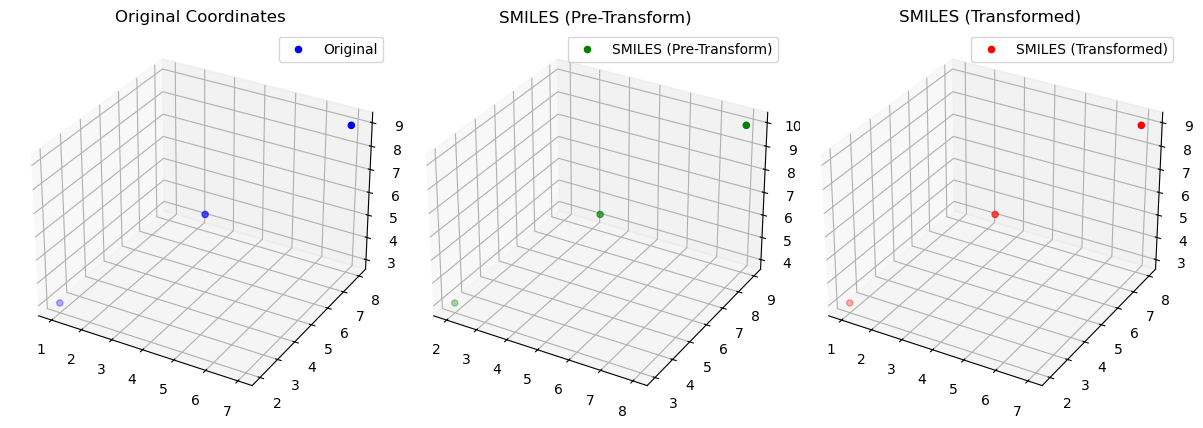

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for matched coordinates
matched_coords_original = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matched_coords_smiles = np.array([[2, 3, 4], [5, 6, 7], [8, 9, 10]])

# Compute centroids
centroid_original = np.mean(matched_coords_original, axis=0)
centroid_smiles = np.mean(matched_coords_smiles, axis=0)

# Centered coordinates
centered_original = matched_coords_original - centroid_original
centered_smiles = matched_coords_smiles - centroid_smiles

# Compute alignment
H = np.dot(centered_smiles.T, centered_original)
U, S, Vt = np.linalg.svd(H)
R = np.dot(U, Vt)

if np.linalg.det(R) < 0:
    Vt[-1, :] *= -1
    R = np.dot(U, Vt)

# Transform smiles coordinates
coords_smiles = matched_coords_smiles
transformed_coords = np.dot(coords_smiles - centroid_smiles, R) + centroid_original

# Plot the transformations
fig = plt.figure(figsize=(12, 6))

# Original coordinates
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(*matched_coords_original.T, color='blue', label='Original')
ax1.set_title('Original Coordinates')
ax1.legend()

# SMILES coordinates before transformation
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(*matched_coords_smiles.T, color='green', label='SMILES (Pre-Transform)')
ax2.set_title('SMILES (Pre-Transform)')
ax2.legend()

# Transformed coordinates
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(*transformed_coords.T, color='red', label='SMILES (Transformed)')
ax3.set_title('SMILES (Transformed)')
ax3.legend()

plt.tight_layout()
plt.show()


In [195]:
from Bio.PDB import PDBParser, Superimposer, PDBIO

# File paths
prehydrogen_pdb_path = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prehydrogen.pdb"
prealigned_pdb_path = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_prealigned.pdb"
output_pdb_path = "/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V_0/4bromo/4bromo_aligned.pdb"

# Parse structures
parser = PDBParser(QUIET=True)
structure_prehydrogen = parser.get_structure("prehydrogen", prehydrogen_pdb_path)
structure_prealigned = parser.get_structure("prealigned", prealigned_pdb_path)

# Extract heavy atoms (non-H) and hydrogens
prehydrogen_heavy_atoms = [atom for atom in structure_prehydrogen.get_atoms() if atom.element != "H"]
prealigned_heavy_atoms = [atom for atom in structure_prealigned.get_atoms() if atom.element != "H"]
prealigned_hydrogens = [atom for atom in structure_prealigned.get_atoms() if atom.element == "H"]

# Ensure the atom counts match for heavy atoms
if len(prehydrogen_heavy_atoms) != len(prealigned_heavy_atoms):
    raise ValueError("Mismatch in heavy atom counts between the prehydrogen and prealigned structures.")

# Map hydrogens to their parent heavy atoms in prealigned
hydrogen_map = {heavy_atom: [] for heavy_atom in prealigned_heavy_atoms}
for hydrogen in prealigned_hydrogens:
    # Find the closest heavy atom
    parent_heavy_atom = min(
        prealigned_heavy_atoms, key=lambda heavy_atom: np.linalg.norm(hydrogen.coord - heavy_atom.coord)
    )
    hydrogen_map[parent_heavy_atom].append(hydrogen)

# Transfer hydrogens to prehydrogen structure
for prehydrogen_atom, prealigned_atom in zip(prehydrogen_heavy_atoms, prealigned_heavy_atoms):
    # Get the hydrogens associated with this heavy atom
    associated_hydrogens = hydrogen_map[prealigned_atom]
    for hydrogen in associated_hydrogens:
        # Calculate the relative offset of the hydrogen
        relative_offset = hydrogen.coord - prealigned_atom.coord
        # Compute the new hydrogen position relative to the prehydrogen heavy atom
        new_hydrogen_position = prehydrogen_atom.coord + relative_offset
        # Create a new hydrogen atom and add it to the prehydrogen structure
        new_hydrogen = hydrogen.copy()
        new_hydrogen.set_coord(new_hydrogen_position)
        prehydrogen_atom.parent.add(new_hydrogen)  # Add hydrogen to the same residue

# Save the updated structure with hydrogens
io = PDBIO()
io.set_structure(structure_prehydrogen)
io.save(output_pdb_path)